In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

## Question 1

In [2]:
# load the given dataset
data = pd.read_csv("Dataset1.csv",header=None)
data.columns = ['x','y']
# extract only the values
data_mat = data.values
# just check the first few rows of the data
data.head()

,x,y
0,4.0374,-9.0699
1,5.0436,-9.5732
2,4.0423,-9.7411
3,2.3432,-10.7960
4,4.3589,-9.1297


## Part (i)

Text(0, 0.5, 'Y')

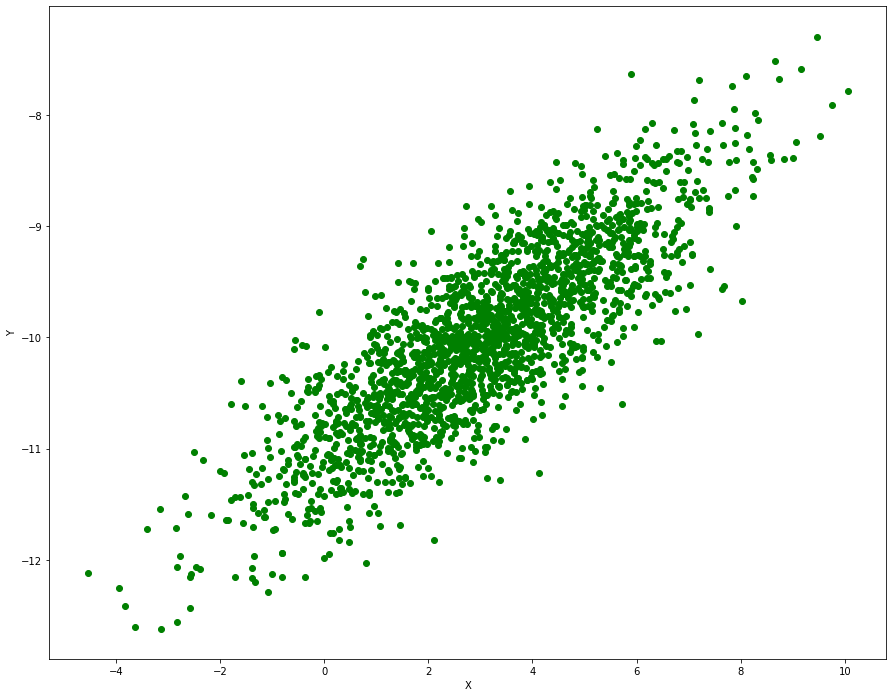

In [3]:
# plotting the data
plt.figure(figsize=(15,12))
plt.scatter(data.x,data.y,c='g')
plt.xlabel("X")
plt.ylabel("Y")

## Part (ii)

In [4]:
# code for calculating MLE estimators
# mean
np.mean(data_mat,0)

array([  3.01386685, -10.01880925])

In [5]:
# covariance matrix
var_covar = ((data_mat - np.mean(data_mat,0)).T @ (data_mat - np.mean(data_mat,0))) / len(data_mat)
var_covar

array([[4.6381915 , 1.45437352],
       [1.45437352, 0.65570033]])

## Part (iii)

In [6]:
# vectorized implementation to compute log-likelihood
log_lik = -len(data) * np.log(2*np.pi) - (len(data) / 2) * np.log(np.linalg.det(var_covar)) - 0.5 * np.sum(((data_mat-np.mean(data_mat,0)) @ np.linalg.inv(var_covar)) * (data_mat-np.mean(data_mat,0)))
print("loglikelihood is:",log_lik)

loglikelihood is: -5598.93933795472


## Part (iv)


In [7]:
# MLE estimator for mean does not change
np.mean(data_mat,0)

array([  3.01386685, -10.01880925])

## Part (v)

Text(0.5, 1, 'log liklihood plot over the mean values')

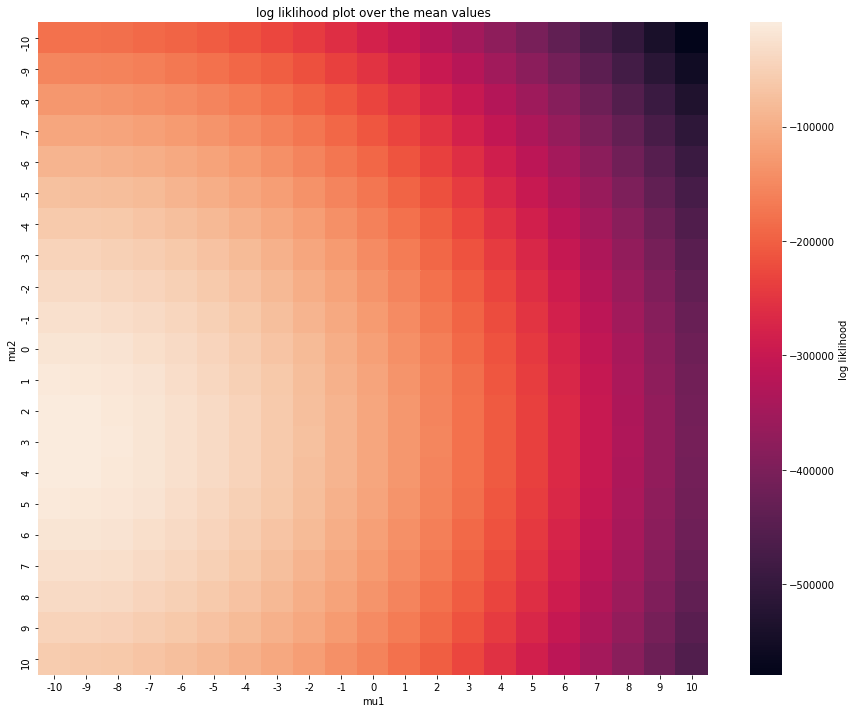

In [8]:
# given covar_mat = [1 0;0 1], compute likelihood values for different values of mu
var_covar = np.array([[1,0],[0,1]]) # given in question itself
plotter = np.zeros((21,21))
max_log = -math.inf
for mu1 in range(-10,11):
    for mu2 in range(-10,11):
        currmu = np.array([mu1,mu2])
        log_lik = -len(data) * np.log(2*np.pi) - (len(data) / 2) * np.log(np.linalg.det(var_covar)) - 0.5 * np.sum(((data_mat-currmu) @ np.linalg.inv(var_covar)) * (data_mat-currmu))
        plotter[mu1+10][mu2+10] = log_lik
        if max_log < log_lik:
            max_log = log_lik
plt.figure(figsize=(15,12))
sns.heatmap(plotter,xticklabels=list(range(-10,11)),yticklabels=list(range(-10,11)),cbar_kws={'label': 'log liklihood'})
plt.xlabel("mu1")
plt.ylabel("mu2")
plt.title("log liklihood plot over the mean values")

## Question 2

In [9]:
# read the data
data = pd.read_csv("Dataset2.csv",header=None)
# extract values
data_mat = data.values

Text(0, 0.5, 'PDF')

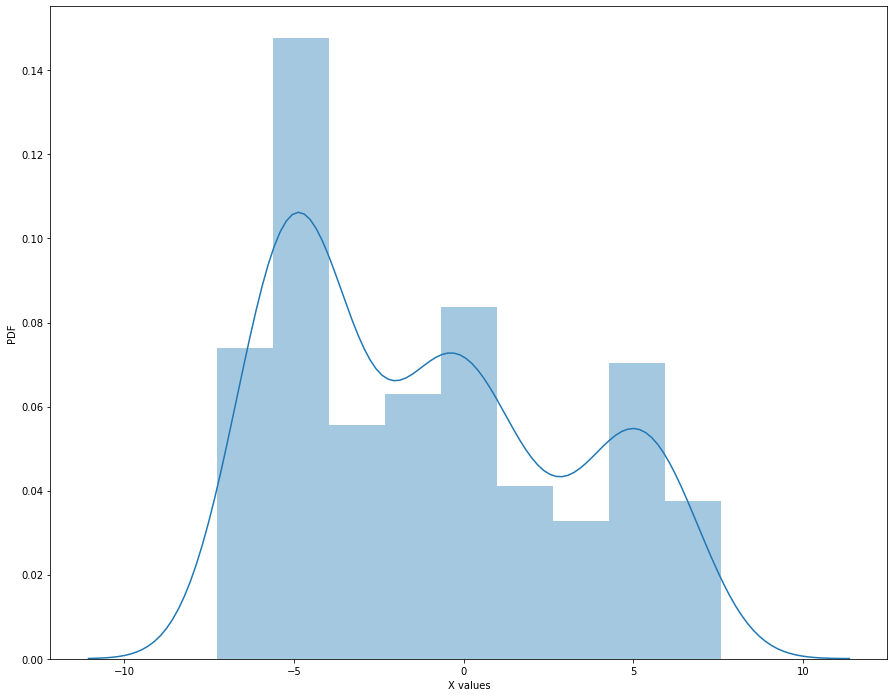

In [10]:
# one dim plot of our data
plt.figure(figsize=(15,12))
sns.distplot(data_mat)
plt.xlabel("X values")
plt.ylabel("PDF")

## Part (i)

In [11]:
# function to evaluate the normal density for ease of use
def norm(x,mu,var):
    return (1 / (np.sqrt(2*np.pi) * np.sqrt(var))) * np.exp(-(x - mu)**2/(2*(var)))
# let us vectorize the above function
norm_v = np.vectorize(norm)

In [12]:
# given k estimate the parameters of the model
# assume k = 3
k = 3
# good initialization for mean and variance values
mean = np.arange(k)+1
var = (np.arange(k)+1)*0.1
mix_coeff = np.array([1/k]*k)
# define the number of iterations here
num_iters = 100
# save the log-liklihood cost here
log_like = []
for i in range(num_iters):
    # E step: first compute the responsibilities matrix
    respon_matrix = norm_v(data_mat,mean.flatten(),var.flatten()) * mix_coeff
    log_like.append(np.sum(np.log(np.sum(respon_matrix,1))))
    # normalize it
    respon_matrix = respon_matrix / np.sum(respon_matrix,1).reshape(-1,1)
    # we have now computed the responsibilities for each data point
    # M step: now update the means, variances and mix coefficients
    mean = np.sum(respon_matrix * data_mat,0) / np.sum(respon_matrix,0)
    var = np.sum(respon_matrix * (data_mat - mean)**2,0) / np.sum(respon_matrix,0)
    mix_coeff = np.mean(respon_matrix,0)
print("k = ",k,"\nmean = ",mean,"\nvar = ",var,"\nmix_coeff = ",mix_coeff)

k =  3 
mean =  [-0.1857632  -4.98581719  5.10017204] 
var =  [2.16573954 1.09146911 1.25609185] 
mix_coeff =  [0.34413132 0.42772268 0.228146  ]


Text(0, 0.5, 'Log-liklihood')

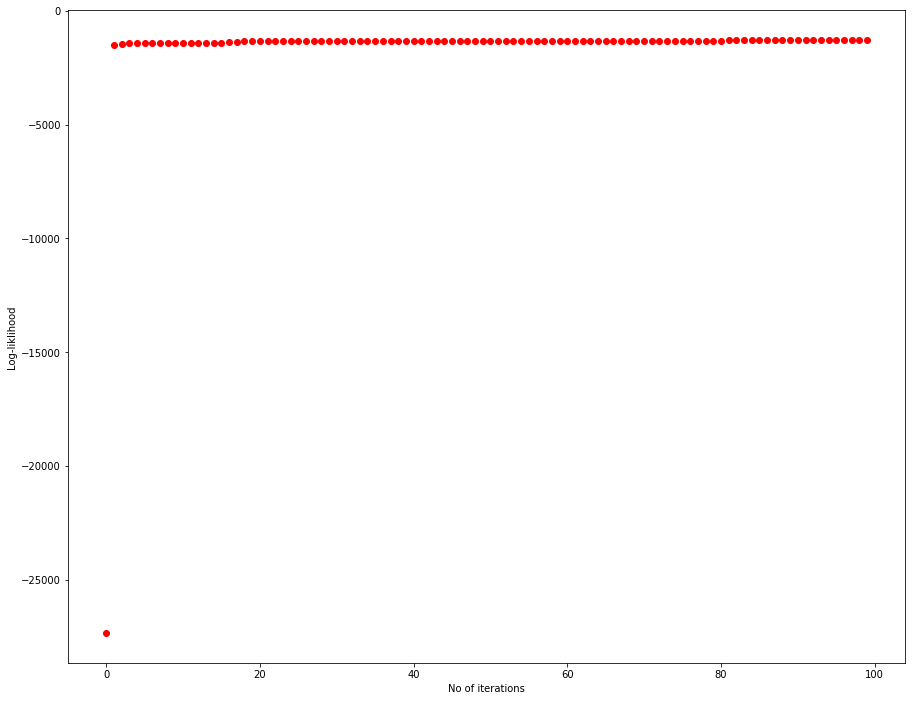

In [13]:
# convergence plot of log-likelihood for k = 3
plt.figure(figsize=(15,12))
plt.scatter(list(range(100)),log_like,c='r')
plt.xlabel("No of iterations")
plt.ylabel("Log-liklihood")

## Part (ii)

In [14]:
# evaluate required parameters for different k's
final_log_like = []
for k in range(1,11):
    mean = np.arange(k)+1
    var = (np.arange(k)+1)*0.1
    mix_coeff = np.array([1/k]*k)
    # define the number of iterations here
    num_iters = 100
    # save the log-liklihood cost here
    log_like = []
    for i in range(num_iters):
        # E step: first compute the responsibilities matrix
        respon_matrix = norm_v(data_mat,mean.flatten(),var.flatten()) * mix_coeff
        log_like.append(np.sum(np.log(np.sum(respon_matrix,1))))
        # normalize it
        respon_matrix = respon_matrix / np.sum(respon_matrix,1).reshape(-1,1)
        # we have now computed the responsibilities for each data point
        # M step: now update the means, variances and mix coefficients
        mean = np.sum(respon_matrix * data_mat,0) / np.sum(respon_matrix,0)
        var = np.sum(respon_matrix * (data_mat - mean)**2,0) / np.sum(respon_matrix,0)
        mix_coeff = np.mean(respon_matrix,0)
    final_log_like.append(log_like[-1])
    print("k =",k,"mean is :",mean)
    print("k =",k,"var is:",var)
    print("k =",k,"mix_coeff is:",mix_coeff)
print("Final loglikelihood for each k:",final_log_like)

k = 1 mean is : [-1.03289019]
k = 1 var is: [17.01069807]
k = 1 mix_coeff is: [1.]
k = 2 mean is : [-0.91832246 -1.03374258]
k = 2 var is: [6.43788228e-04 1.71371558e+01]
k = 2 mix_coeff is: [0.00738513 0.99261487]
k = 3 mean is : [-0.1857632  -4.98581719  5.10017204]
k = 3 var is: [2.16573954 1.09146911 1.25609185]
k = 3 mix_coeff is: [0.34413132 0.42772268 0.228146  ]
k = 4 mean is : [ 0.12422088 -1.29822342 -5.02288597  5.10537926]
k = 4 var is: [1.92205502 2.27269601 1.04109424 1.24440383]
k = 4 mix_coeff is: [0.2547258  0.09999999 0.41755222 0.22772198]
k = 5 mean is : [-0.18982015  0.27561947 -5.85517826 -4.56348991  5.12098143]
k = 5 var is: [2.0807506  4.75062385 0.49522582 0.8410026  1.2260216 ]
k = 5 mix_coeff is: [0.31910693 0.02820008 0.13907692 0.28870837 0.2249077 ]
k = 6 mean is : [-0.24984672  0.56371987 -1.99291025 -5.04382395  0.9990028   5.25157707]
k = 6 var is: [1.11907225 4.46246301 3.06698218 1.02660857 4.11855704 1.064793  ]
k = 6 mix_coeff is: [0.15811503 0.020

## Part (iii)

Text(0, 0.5, 'Converged loglikelihood')

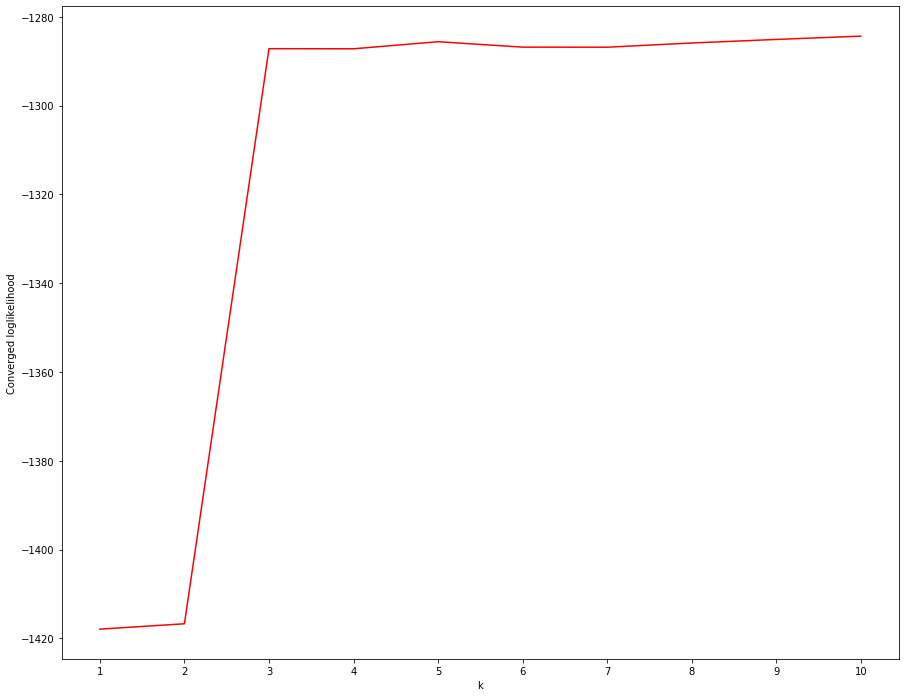

In [15]:
# plot the loglikelihood values for different values of k
plt.figure(figsize=(15,12))
plt.plot(list(range(1,11)),final_log_like,c='r')
plt.xlabel("k")
plt.xticks(list(range(1,11)))
plt.ylabel("Converged loglikelihood")
# explanation given in report

## Question 3

Text(0, 0.5, 'Y')

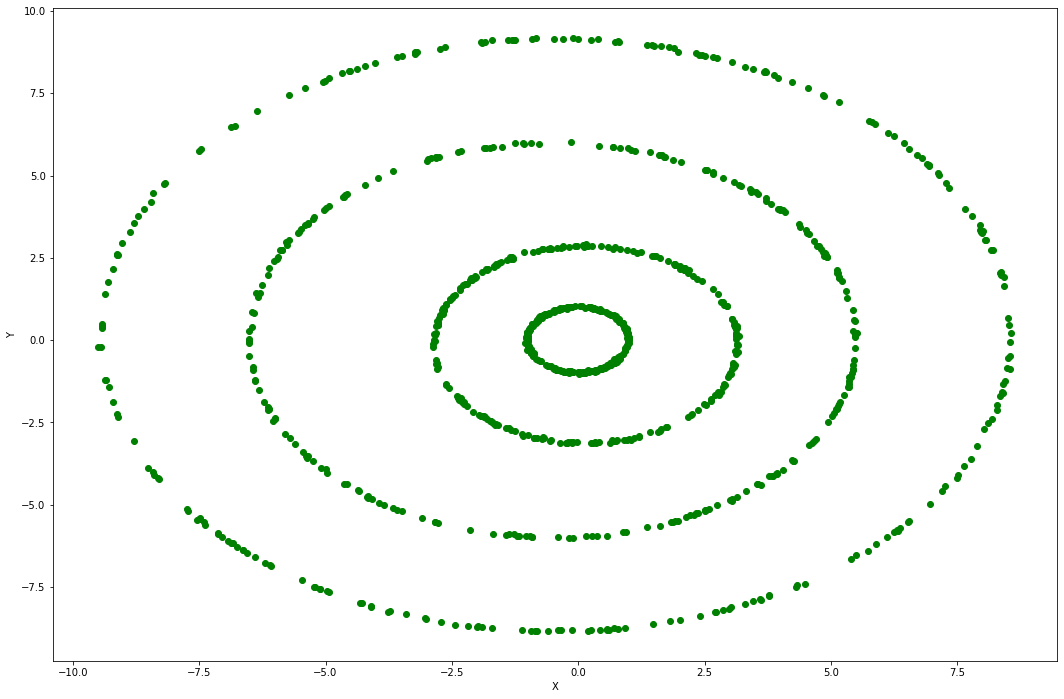

In [16]:
# read the data
data = pd.read_csv("Dataset3.csv",header=None)
# get values
data_mat = data.values
# plot of the data
plt.figure(figsize=(18,12))
plt.scatter(data_mat[:,0],data_mat[:,1],c='g')
plt.xlabel("X")
plt.ylabel("Y")

## Part (i)

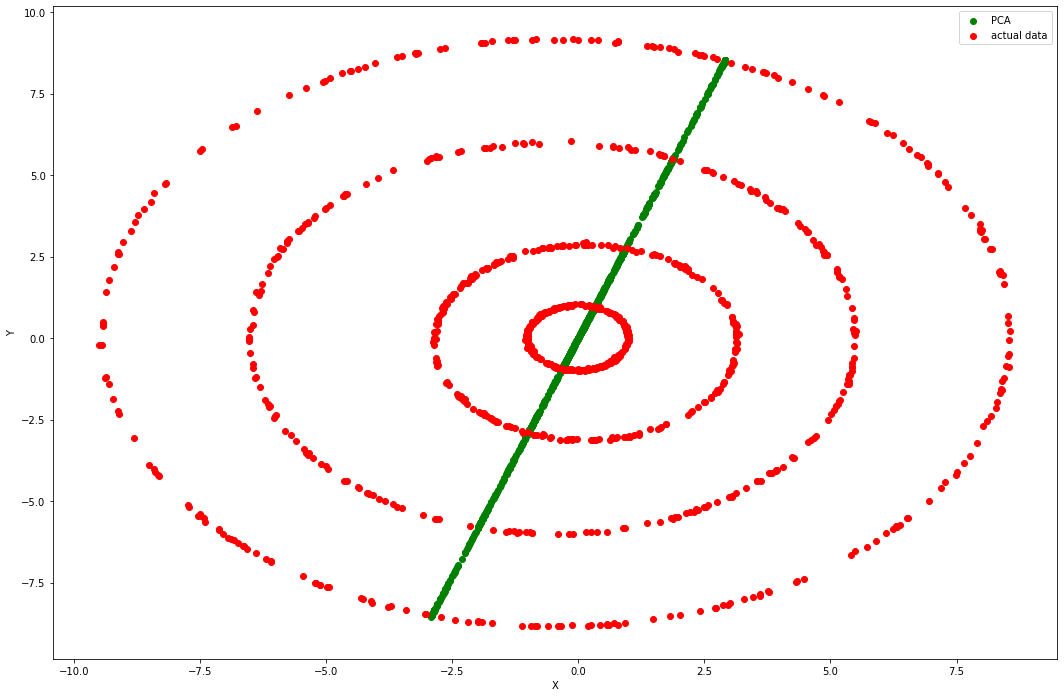

In [17]:
# perform PCA with number of features = 1
# center the data
data_mat = data_mat - np.mean(data_mat,0)
# compute the variance covariance matrix
var_covar = data_mat.T @ data_mat / len(data_mat)
# perform eigenvalue decomposition of the variance-covariance matrix and get the eigenvector corresponding to greatest eigenvalue
pc_vec = np.linalg.eig(var_covar)[1][:,1].reshape(-1,1)
# now just project the actual data onto the principal components
projec = data_mat @ pc_vec
# get the reconstructed datapoints for plotting
actual_projec = actual_projec = projec @ pc_vec.T
# plot the datapoints
plt.figure(figsize=(18,12))
plt.scatter(actual_projec[:,0],actual_projec[:,1],c='g',label="PCA")
plt.scatter(data_mat[:,0],data_mat[:,1],c='r',label="actual data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

In [18]:
# get explained variance of each component
print("Explained variance eigenvectors in descending order :",np.linalg.eig(var_covar)[0][::-1]/np.sum(np.linalg.eig(var_covar)[0]),)

Explained variance eigenvectors in descending order : [0.54178025 0.45821975]


## Part (ii)

Polynomial Kernel:

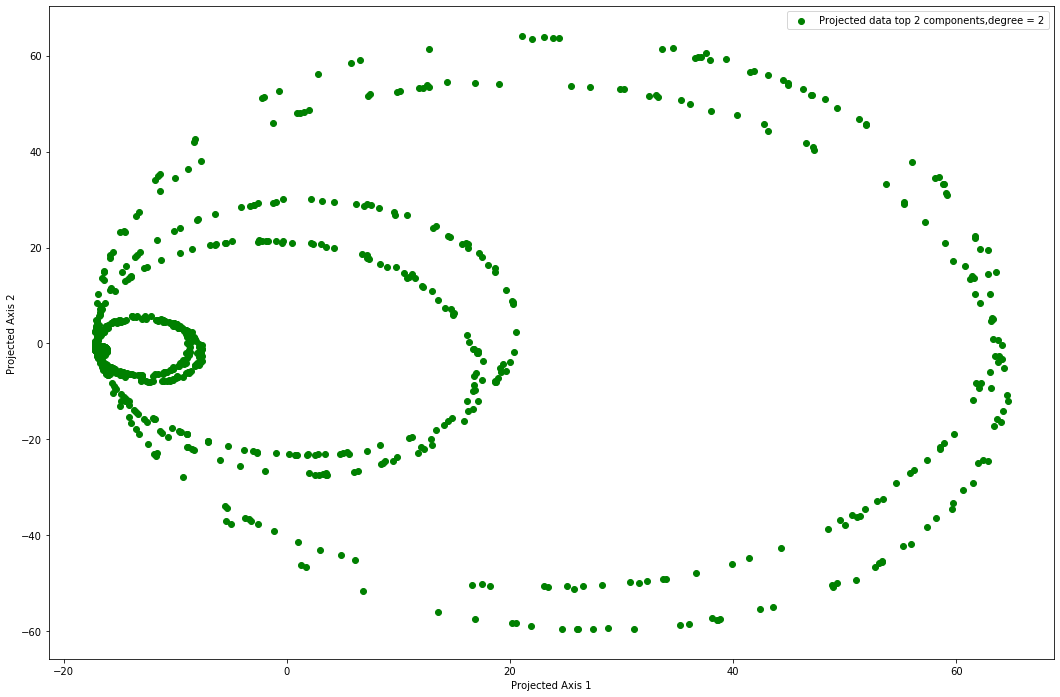

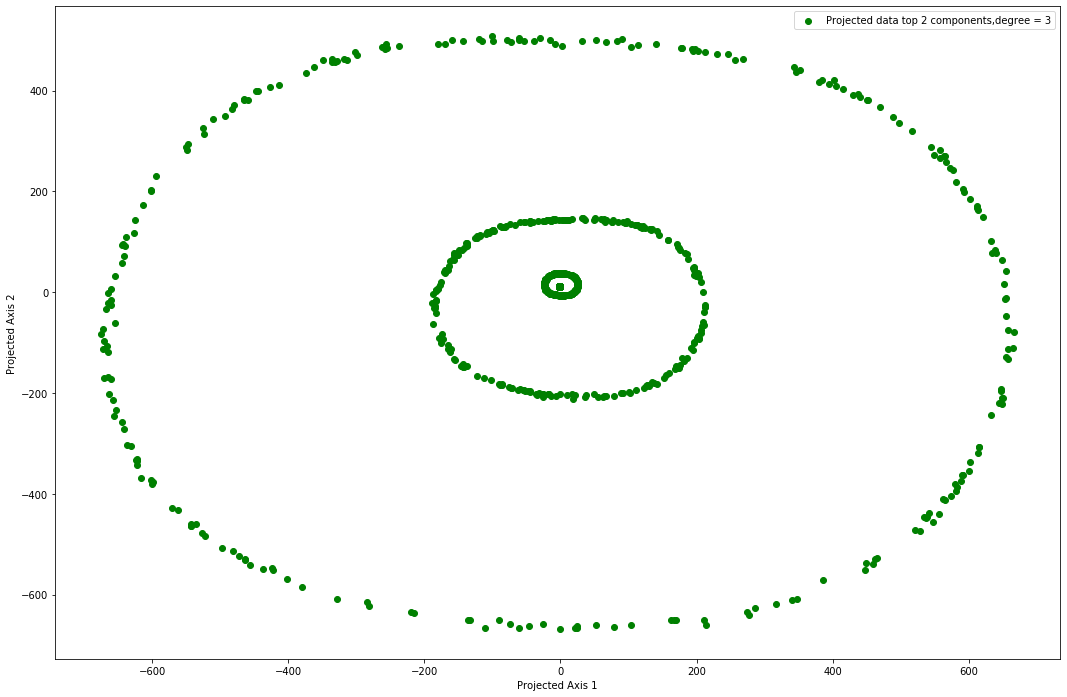

In [19]:
for degree in [2,3]:
    # center the data
    data_mat -= np.mean(data_mat,0)
    # compute the kernel matrix
    kernel_matrix = (1 + data_mat @ data_mat.T)**degree
    # center the kernel matrix
    one_n = np.ones(kernel_matrix.shape) / len(data_mat)
    centered_kernel_matrix = kernel_matrix - one_n@kernel_matrix - kernel_matrix@one_n + one_n@kernel_matrix@one_n
    # get the eigenvalues and eigenvectors of the kernel matrix
    eigen_values = np.linalg.eigh(centered_kernel_matrix)[0][-2:][::-1]
    eigen_vectors = np.linalg.eigh(centered_kernel_matrix)[1][:,-2:]
    # swap the columns, to get the greatest eigenvector first
    eigen_vectors[:,[0, 1]] = eigen_vectors[:,[1, 0]]
    # scale the eigenvectors to get transformed data
    trans_data = eigen_vectors * np.sqrt(eigen_values)
    plt.figure(figsize=(18,12))
    plt.scatter(trans_data[:,0],trans_data[:,1],c='g',label="Projected data top 2 components,degree = "+str(degree))
    plt.xlabel("Projected Axis 1")
    plt.ylabel("Projected Axis 2")
    plt.legend()

Gaussian Kernel:

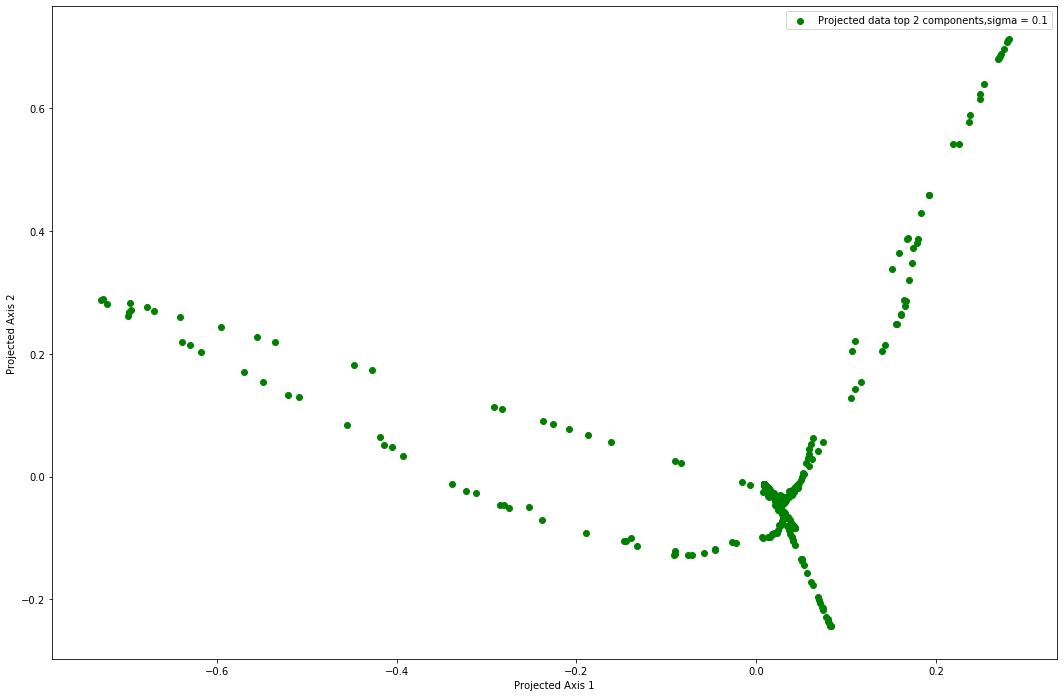

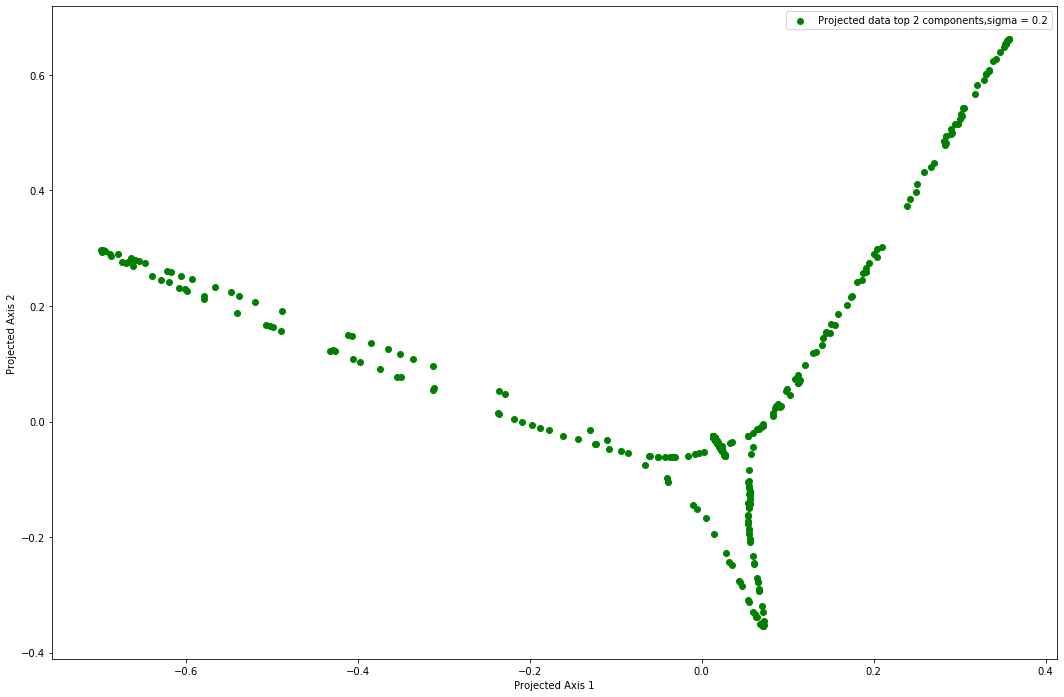

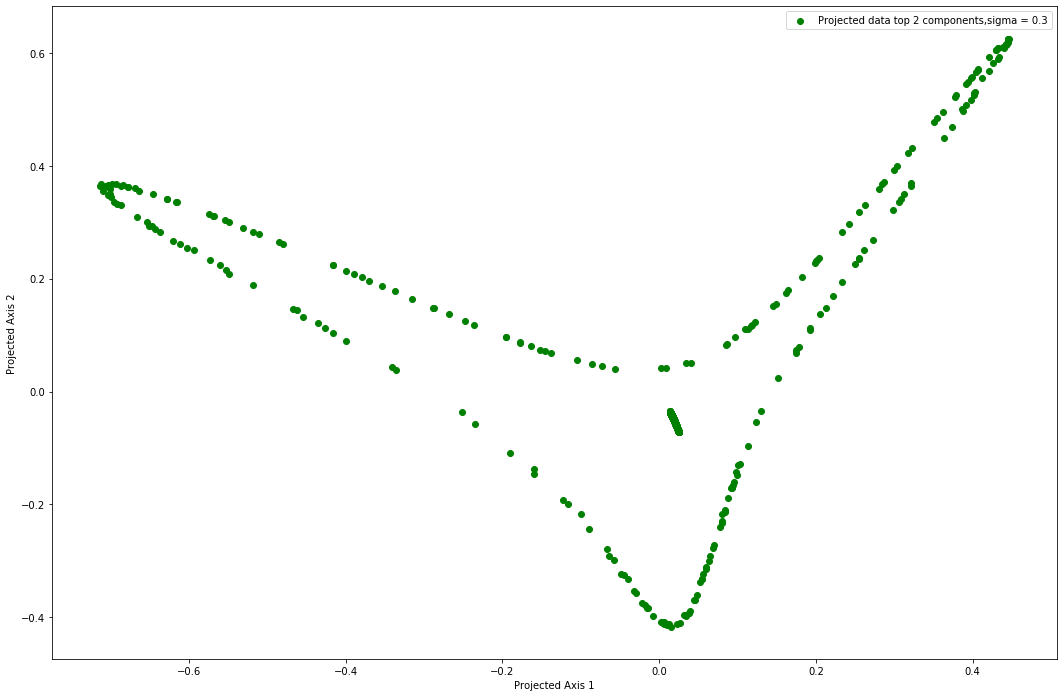

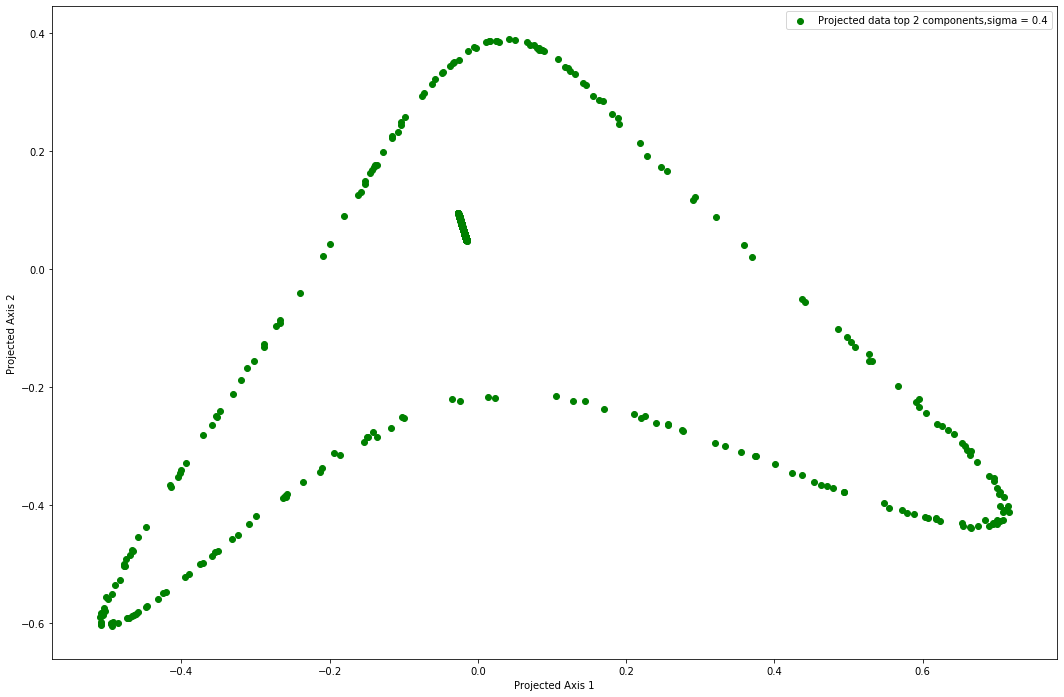

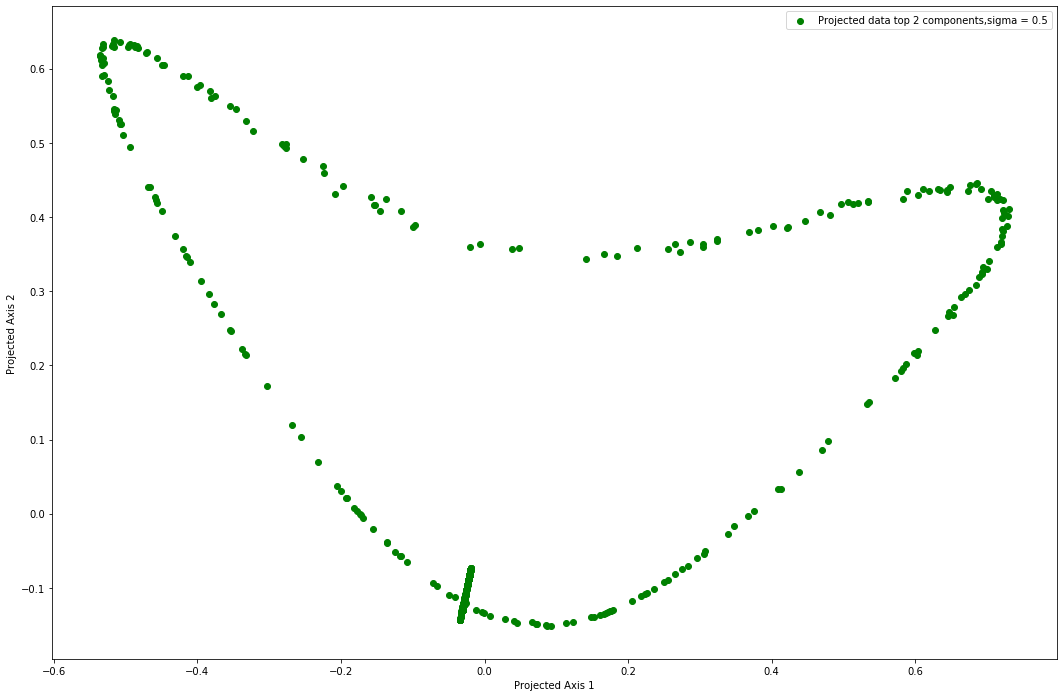

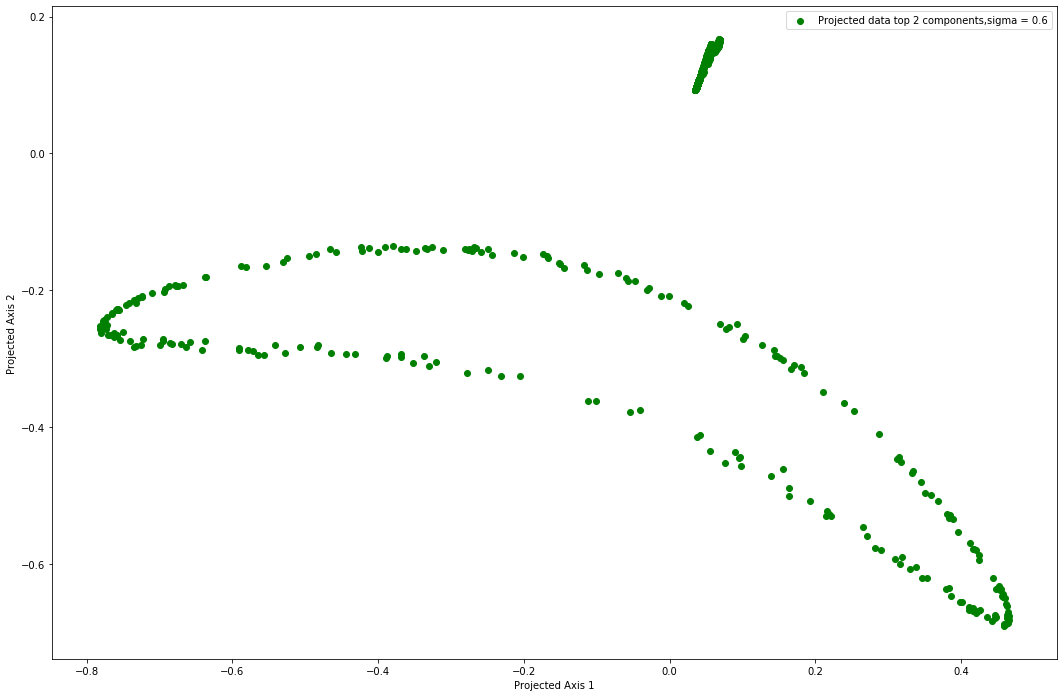

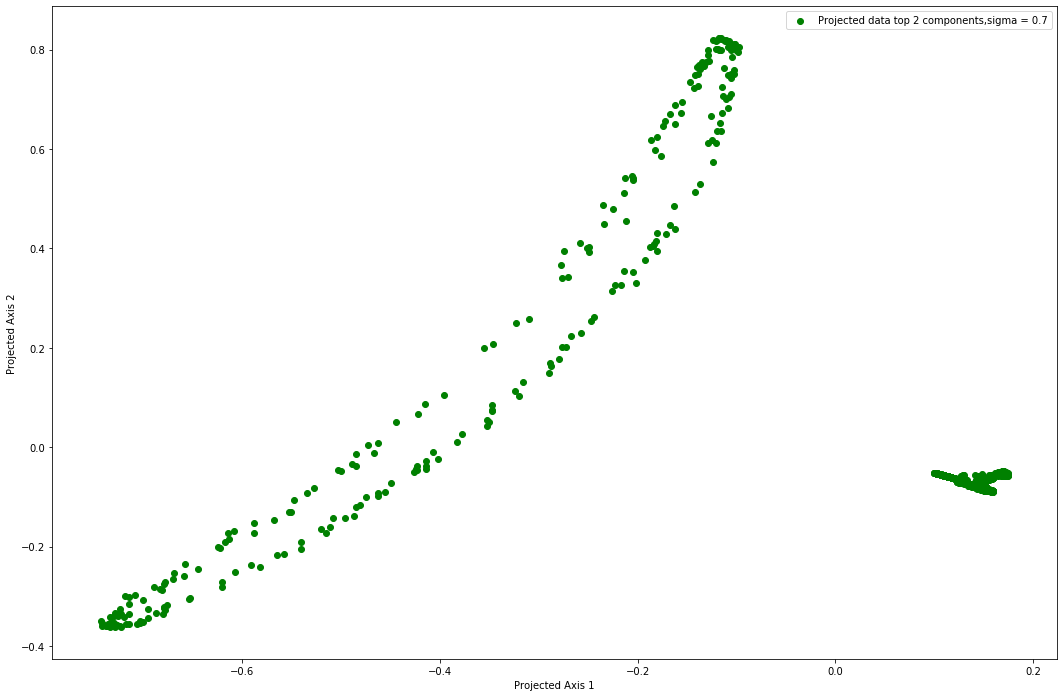

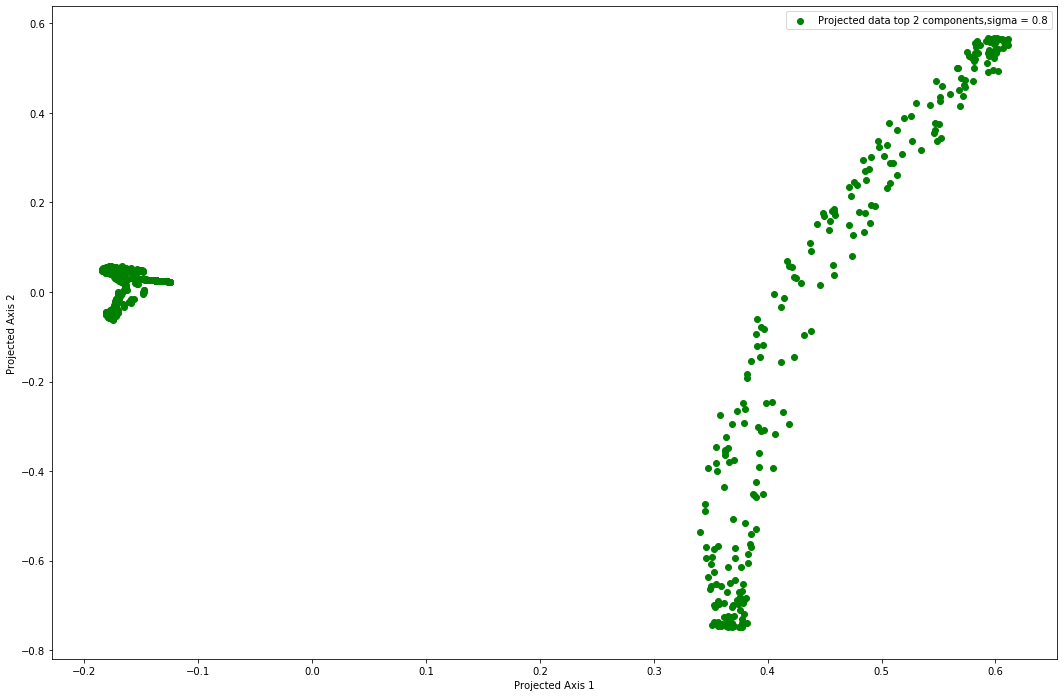

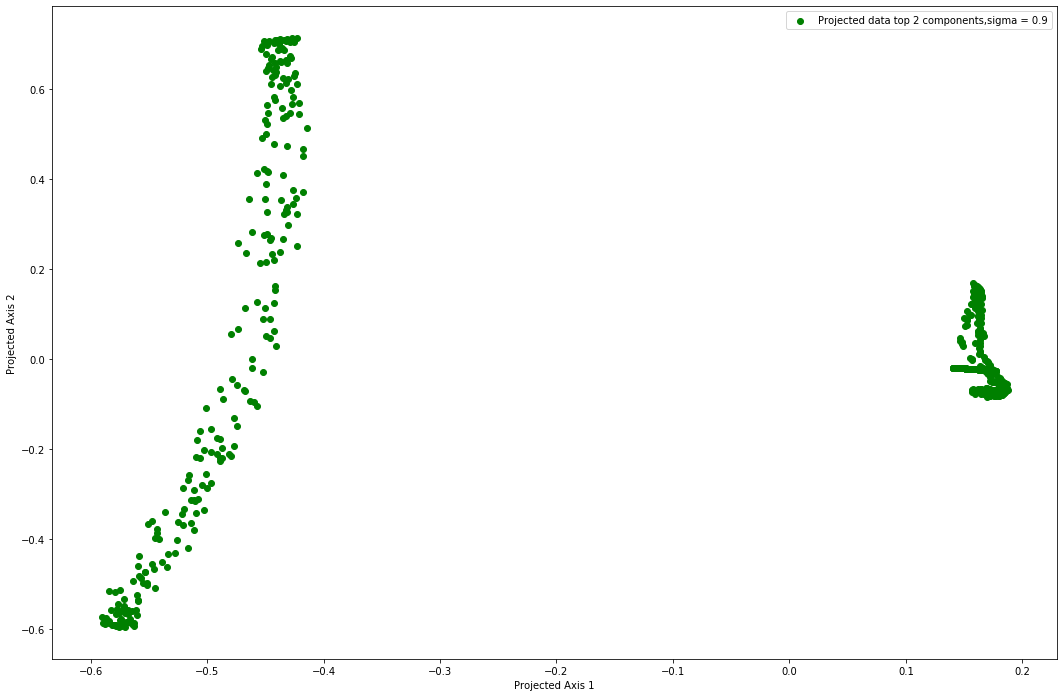

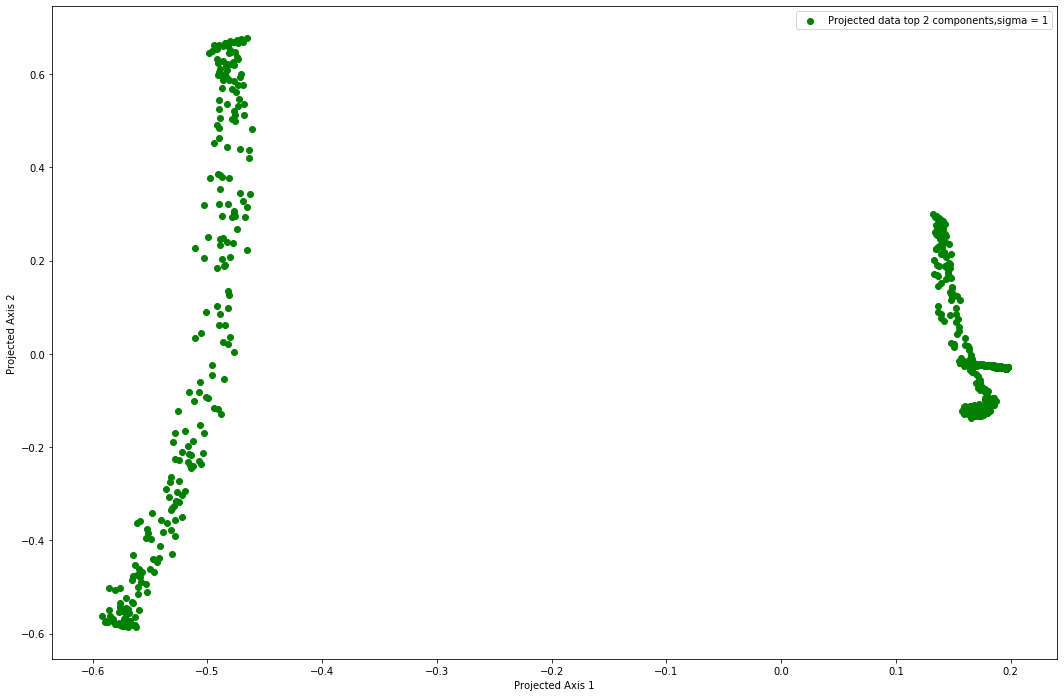

In [20]:
# loop over values of sigma
for sigma in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    # vectorized implementation of the kernel matrix
    kernel_matrix = np.exp(-(np.sum(data_mat**2,1).reshape(-1,1) + np.sum(data_mat**2,1).reshape(1,-1) - 2*data_mat @ data_mat.T)/(2*sigma**2))
    # we now have to center the kernel matrix
    one_n = np.ones(kernel_matrix.shape) / len(kernel_matrix)
    # center the kernel matrix
    centered_kernel_matrix = kernel_matrix - one_n@kernel_matrix - kernel_matrix@one_n + one_n@kernel_matrix@one_n
    # do eigenvalue deomposition
    eigen_values = np.linalg.eigh(centered_kernel_matrix)[0][-2:][::-1]
    eigen_vectors = np.linalg.eigh(centered_kernel_matrix)[1][:,-2:]
    # swap the columns, to get the greatest eigenvector first
    eigen_vectors[:,[0, 1]] = eigen_vectors[:,[1, 0]]
    pc_vec = eigen_vectors * np.sqrt(eigen_values)
    plt.figure(figsize=(18,12))
    plt.scatter(pc_vec[:,0],pc_vec[:,1],c='g',label="Projected data top 2 components,sigma = "+str(sigma))
    plt.xlabel("Projected Axis 1")
    plt.ylabel("Projected Axis 2")
    plt.legend()

## Part (iii)

Explanation was given in report.